# Weighted Maxcut: Classical Computer v.s. D-Wave v.s. Qiskit

In [1]:
# IMPORTS
from GraphTools import *
from matplotlib import pyplot as plt

In [26]:
NODE_RANGE = range(3, 16) # Determine what graph sizes to test the Maxcut solutions on

def plot_time_growth(node_range, time_data, units, log_scale=False):
    """Plot the growth in time taken to solve the Max Cut problem as the number of nodes increases"""
    x = node_range
    y = time_data
    
    plt.xlabel("Number of Nodes")
    plt.ylabel(f"Solve Time ({units})")
    
    if log_scale:
        plt.yscale("log")
        print("Using logarithmic scale")
    
    plt.scatter(x,y)

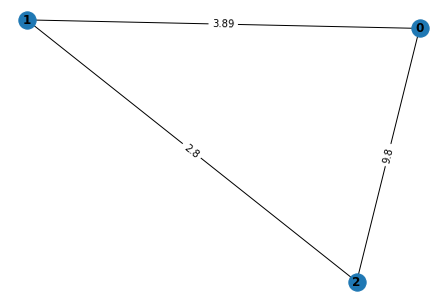

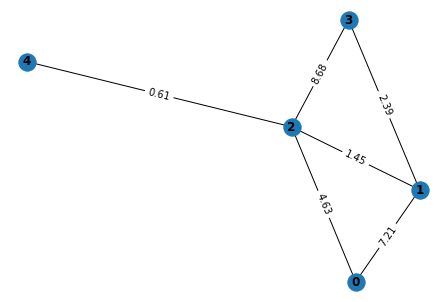

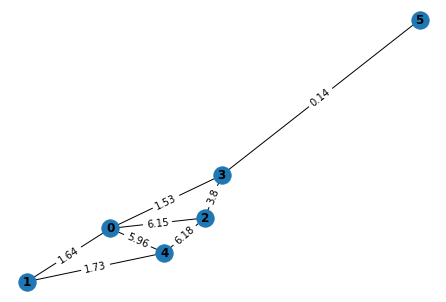

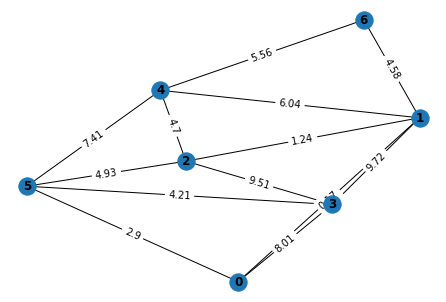

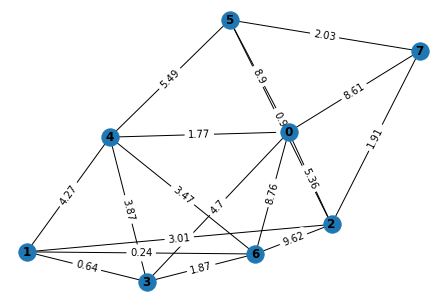

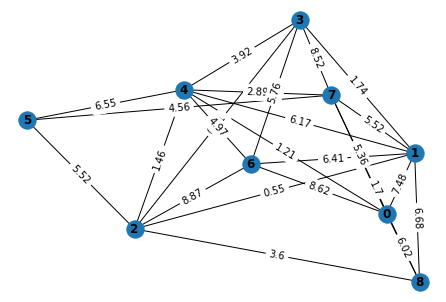

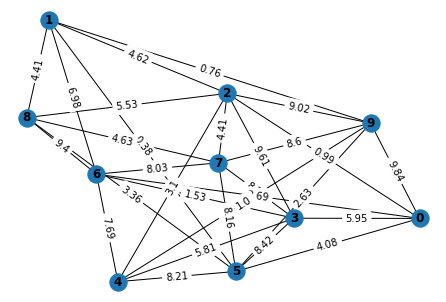

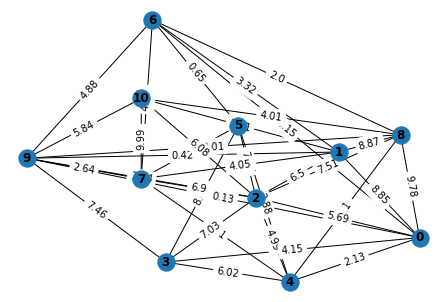

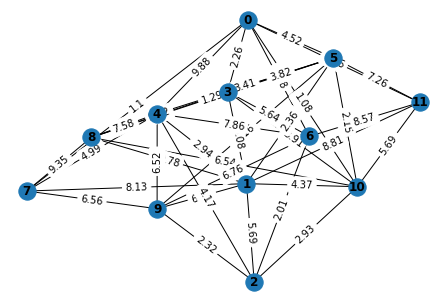

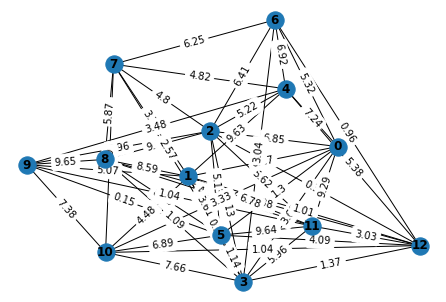

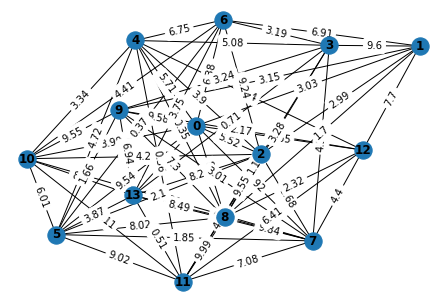

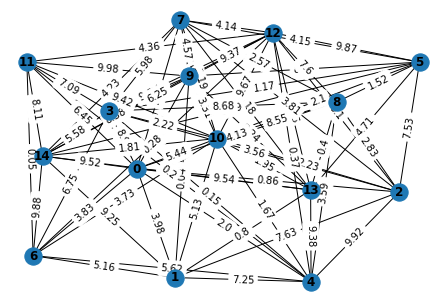

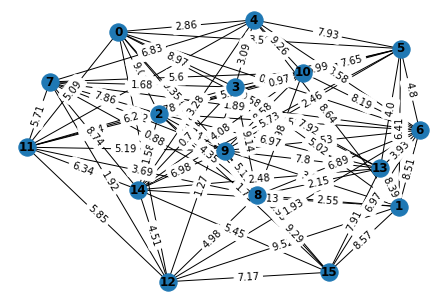

In [3]:
# Generate Graphs
graphs = []
positions = [] # Save the positions so that the graphs are drawn exactly the same way each time
for n in NODE_RANGE:
    G = generate_random_connected_graph(n, 10, math.floor(n*(n-1)/2))
    graphs.append(G)
    positions.append(nx.spring_layout(G))
    
for graph, pos in zip(graphs, positions):
    plt.figure()
    graph.draw_original(pos)
    

In [4]:
for graph in graphs:
    print(len(list(graph.nodes)),len(list(graph.edges)))

3 3
5 6
6 8
7 13
8 18
9 24
10 29
11 36
12 39
13 53
14 64
15 76
16 82


## Classical Solution
Find the maximum cut for each graph classically by trying each possible configuration. The time complexity should be $O(2^n)$

In [5]:
# Solve Max Cut Classically
solutions = []
for graph in graphs:
    solutions.append(graph.solve_maxcut_classical())

Solution: 011, Cut Value: -13.690000000000001
Solution: 01100, Cut Value: -23.52
Solution: 011001, Cut Value: -19.64
Solution: 0001100, Cut Value: -55.16000000000001
Solution: 01010111, Cut Value: -63.53999999999999
Solution: 000010111, Cut Value: -89.22999999999999
Solution: 0001011011, Cut Value: -120.61999999999998
Solution: 00110011100, Cut Value: -122.38000000000001
Solution: 000110010111, Cut Value: -151.50999999999996
Solution: 0010101010110, Cut Value: -186.57999999999996
Solution: 00110110010111, Cut Value: -232.23000000000002
Solution: 011000111101010, Cut Value: -250.71999999999997
Solution: 0011101011001010, Cut Value: -300.98


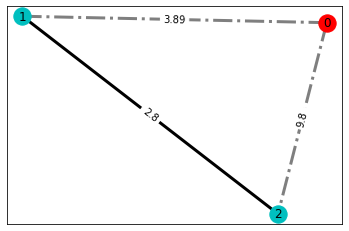

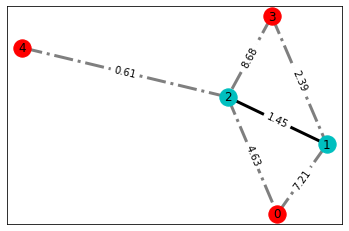

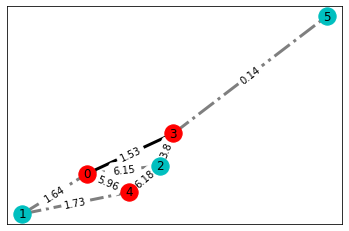

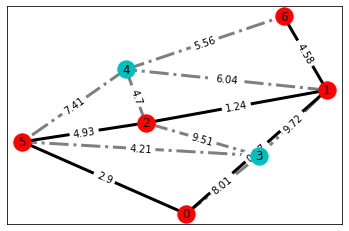

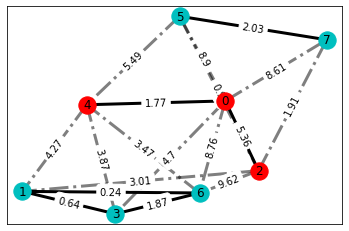

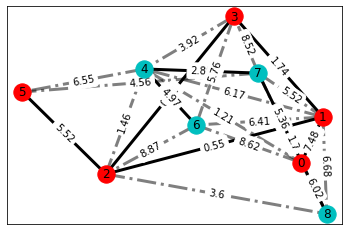

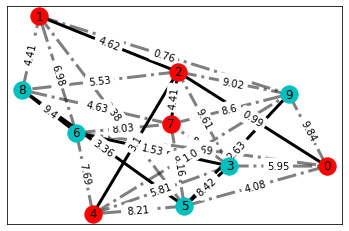

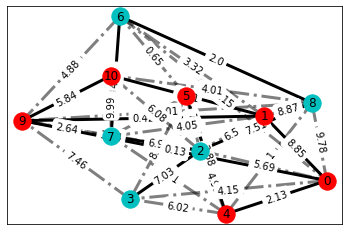

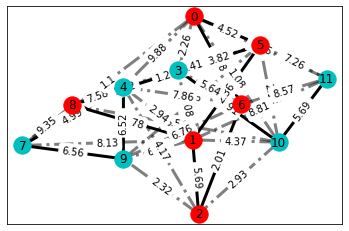

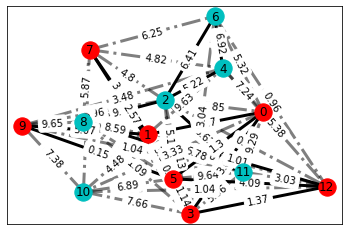

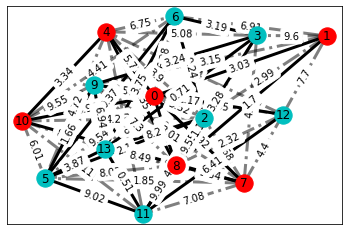

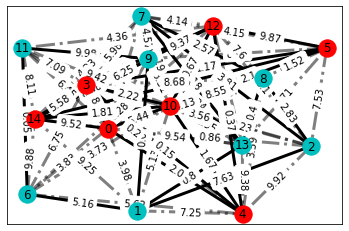

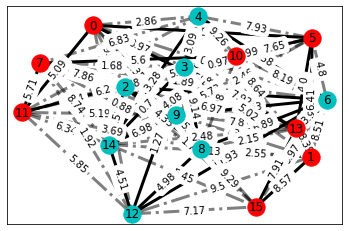

In [6]:
# Display solutions
for graph, pos, solution in zip(graphs, positions, solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [7]:
# Solve again, but this time keeping track of runtimes.
classical_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_classical()
    classical_times.append(t)

91.1 µs ± 5.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
474 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.06 ms ± 42.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.02 ms ± 89.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.35 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.4 ms ± 600 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
46.3 ms ± 645 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
114 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
252 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
635 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.5 s ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.46 s ± 84.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.67 s ± 95.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# Print average solve time for each number of nodes
for t in classical_times:
    print(str(t.average) + " seconds")

9.114390885715045e-05 seconds
0.0004743900187143026 seconds
0.0010573876491428433 seconds
0.0030227775114285904 seconds
0.0073513452085714045 seconds
0.01941306164857159 seconds
0.04631710422857265 seconds
0.11434822444285665 seconds
0.2516594070000175 seconds
0.6353218305714238 seconds
1.4984640698571476 seconds
3.4631601984285845 seconds
7.666765674428559 seconds


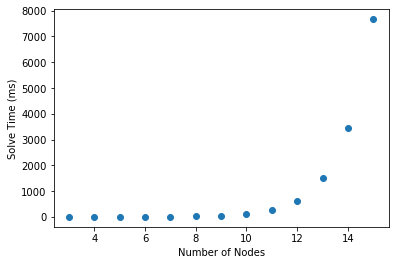

In [29]:
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms")

Using logarithmic scale


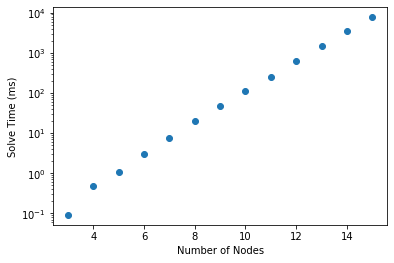

In [28]:
# Plot the same data using a logarithmic scale
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms", log_scale=True)

## D-Wave Solution
Find the maximum cut with D-Wave's Quantum Computer.

In [10]:
# Solve Max Cut 
dwave_solutions = []
dwave_solve_times = []
for graph in graphs:
    sol, runtime = graph.solve_maxcut_dwave(return_runtime = True)
    dwave_solutions.append(sol)
    dwave_solve_times.append(runtime)

Solution: 100, Cut Value: -13.690000000000001
Solution: 10011, Cut Value: -23.52
Solution: 011001, Cut Value: -19.64
Solution: 1110011, Cut Value: -55.16000000000001
Solution: 10101000, Cut Value: -63.53999999999999
Solution: 111101000, Cut Value: -89.22999999999999
Solution: 0001011011, Cut Value: -120.61999999999998
Solution: 11001100011, Cut Value: -122.38000000000001
Solution: 111001101000, Cut Value: -151.50999999999996
Solution: 0010101010110, Cut Value: -186.57999999999996
Solution: 00110110010111, Cut Value: -232.23000000000002
Solution: 011000111101010, Cut Value: -250.71999999999997
Solution: 0011101011001010, Cut Value: -300.98


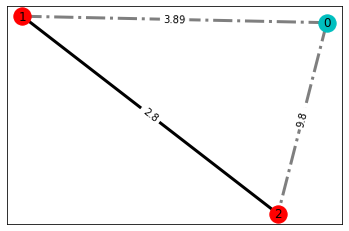

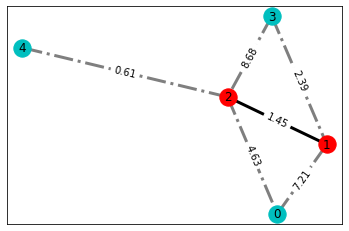

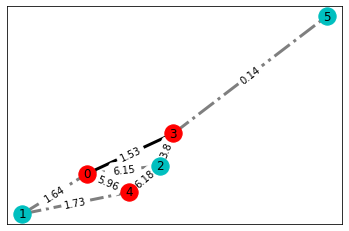

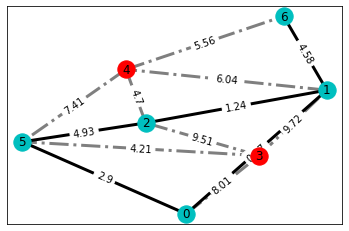

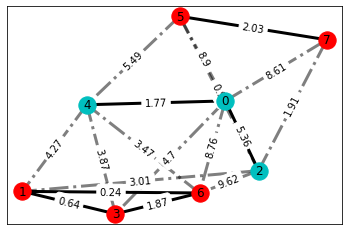

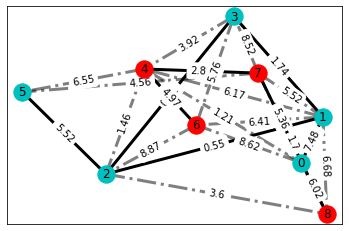

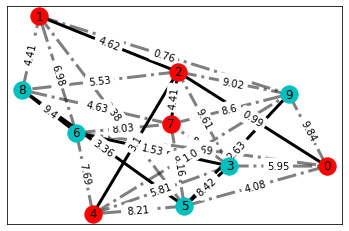

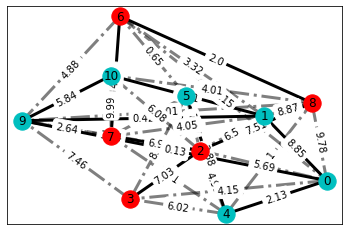

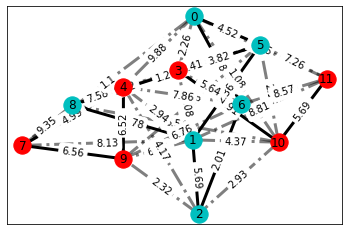

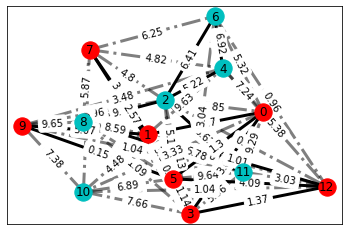

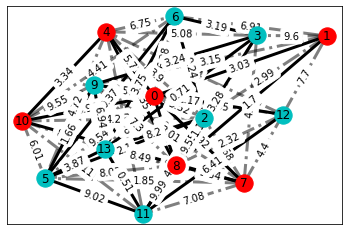

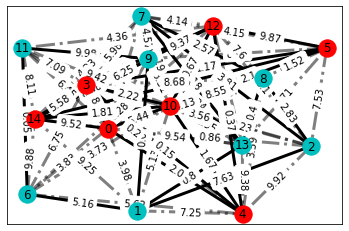

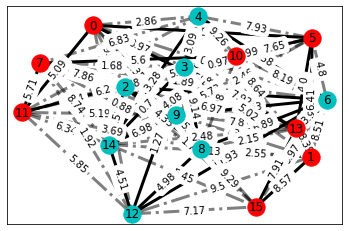

In [11]:
# Display Results
for graph, pos, solution in zip(graphs, positions, dwave_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [12]:
# Display Runtimes
for runtime in dwave_solve_times:
    print(runtime)

26781 microseconds
26756 microseconds
26845 microseconds
26882 microseconds
26802 microseconds
26901 microseconds
26901 microseconds
26864 microseconds
26891 microseconds
26900 microseconds
26973 microseconds
27023 microseconds
26916 microseconds


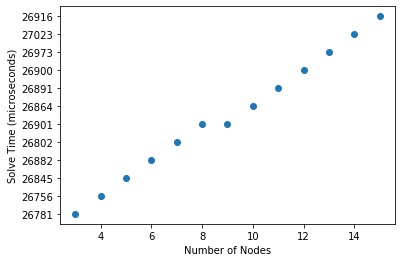

In [13]:
# Clean up runtime data from dwave maxcut method
dwave_solve_times = [t.replace(" microseconds","") for t in dwave_solve_times]
#dwave_solve_times = [int(t)/1000 for t in dwave_solve_times] # Convert microseconds to ms

# Plot runtimes
plot_time_growth(NODE_RANGE, dwave_solve_times, "microseconds")

In [14]:
# Compare accuracy of solution
print("Ratios between D-Wave solutions and actual solutions (to compare accuracy):")
for graph, solution, dwave_solution in zip(graphs, solutions, dwave_solutions):
    print(graph.get_cut_size(dwave_solution) / graph.get_cut_size(solution))

Ratios between D-Wave solutions and actual solutions (to compare accuracy):
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


## Qiskit Solution

In [15]:
P = 2 # Choose number of iterations to apply cost unitary

# Solve Max Cut with Qiskit
qiskit_solutions = []
for graph in graphs:
    qiskit_solutions.append(graph.solve_maxcut_qiskit(P))

Solution: 100, Cut Value: -13.690000000000001
Solution: 10010, Cut Value: -22.91
Solution: 101000, Cut Value: -19.11
Solution: 1100110, Cut Value: -42.95
Solution: 10101110, Cut Value: -30.509999999999998
Solution: 101000010, Cut Value: -67.32999999999998
Solution: 1110001100, Cut Value: -100.92999999999996
Solution: 11101110101, Cut Value: -74.66000000000001
Solution: 010100011000, Cut Value: -74.22
Solution: 0111110010110, Cut Value: -132.78000000000003
Solution: 11110111010001, Cut Value: -166.11000000000004
Solution: 010101101111100, Cut Value: -172.22
Solution: 1000001100110100, Cut Value: -253.20000000000002


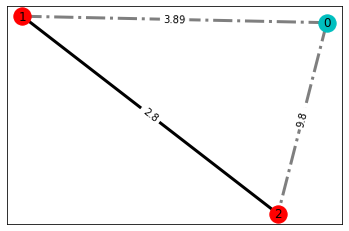

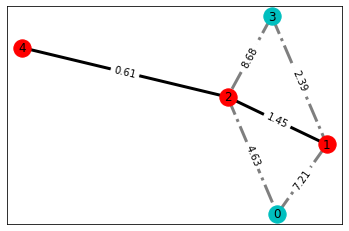

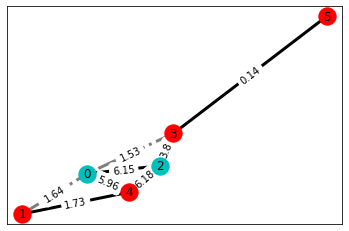

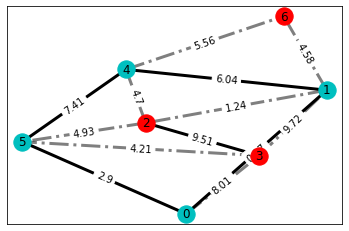

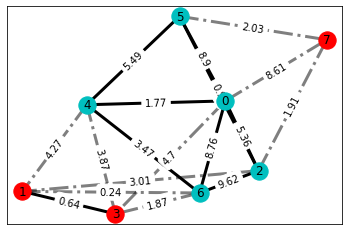

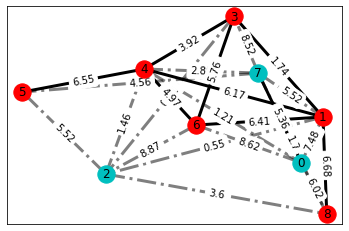

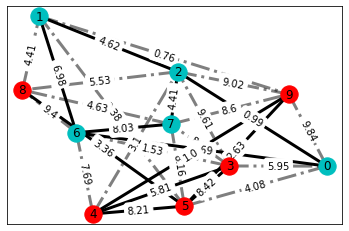

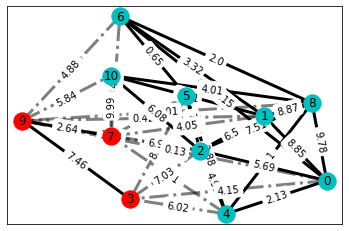

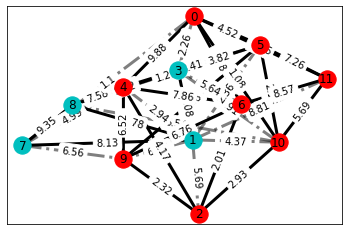

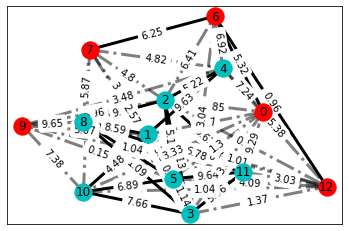

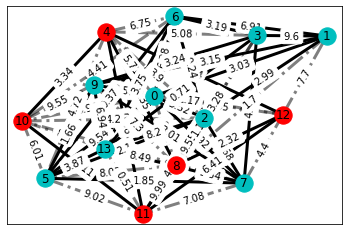

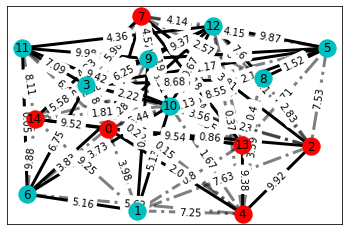

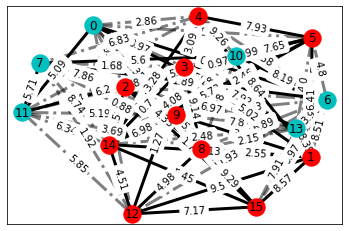

In [16]:
# Display Results
for graph, pos, solution in zip(graphs, positions, qiskit_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [19]:
# Compare accuracy of solution
print("Ratios between Qiskit solutions and actual solutions (to compare accuracy):")
for graph, solution, qiskit_solution in zip(graphs, solutions, qiskit_solutions):
    print(graph.get_cut_size(qiskit_solution) / graph.get_cut_size(solution))

Ratios between Qiskit solutions and actual solutions (to compare accuracy):
1.0
0.9740646258503401
0.9730142566191445
0.7786439448875996
0.48016997167138814
0.7545668497142216
0.8367600729563919
0.6100670044124857
0.48986865553428827
0.7116518383535216
0.715282263273479
0.6869017230376516
0.8412519104259419


In [20]:
# Check Runtimes
qiskit_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_qiskit(P)
    qiskit_times.append(t)

604 ms ± 51.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.06 s ± 92.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.23 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.61 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.23 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.3 s ± 316 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.15 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.39 s ± 363 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.43 s ± 275 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.28 s ± 626 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.5 s ± 498 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.8 s ± 1.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
18.6 s ± 880 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
# Print average runtimes
for t in qiskit_times:
    print(str(t.average) + " seconds")

0.6038801102857049 seconds
1.064777331285768 seconds
1.2278084995714704 seconds
1.613908756714279 seconds
2.226744871714313 seconds
3.304457408142915 seconds
4.145388794142881 seconds
5.392317007428606 seconds
6.433109051571397 seconds
9.280888687571503 seconds
10.526822488571431 seconds
16.804811317428598 seconds
18.587079095571426 seconds


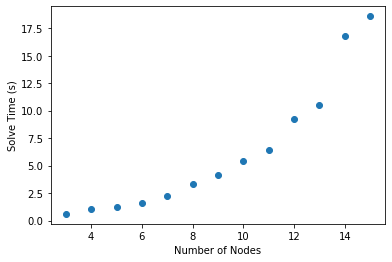

In [30]:
# Plot data
plot_time_growth(NODE_RANGE, [t.average for t in qiskit_times], "s")

Using logarithmic scale


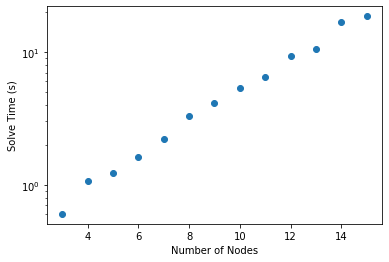

In [31]:
# Plot the same data using a logarithmic scale
plot_time_growth(NODE_RANGE, [t.average for t in qiskit_times], "s", log_scale=True)